### Importing the required libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt,cm
from warnings import filterwarnings as fw
fw('ignore')
%matplotlib inline

### Importing the data

In [2]:
train = pd.read_csv('D:/Placements assignments/Dhira activity/tmdb-5000-movie-dataset/tmdb_5000_movies.csv')
train.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Overview report of the data

In [3]:
import pandas_profiling as pf
pf.ProfileReport(train)

Number of variables,20
Number of observations,4803
Total Missing (%),4.1%
Total size in memory,750.5 KiB
Average record size in memory,160.0 B
Numeric,7
Categorical,13
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [5]:
train.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


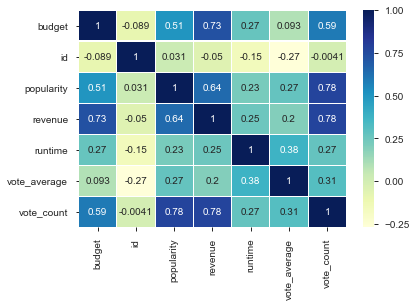

In [7]:
%matplotlib inline
sns.heatmap(train.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

Descriptive Stats for the revenue are:
  count    4.803000e+03
mean     8.226064e+07
std      1.628571e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291719e+07
max      2.787965e+09
Name: revenue, dtype: float64


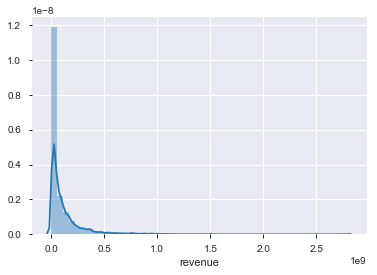

In [8]:
print('Descriptive Stats for the revenue are:\n ', train.revenue.describe())
sns.distplot(train.revenue);

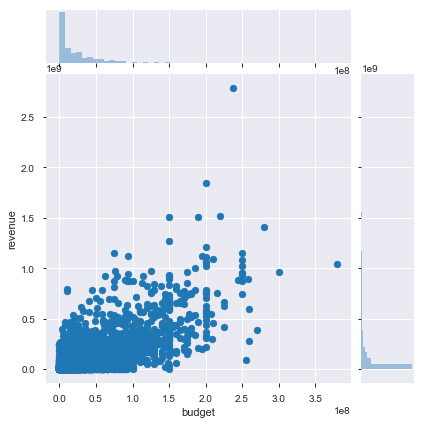

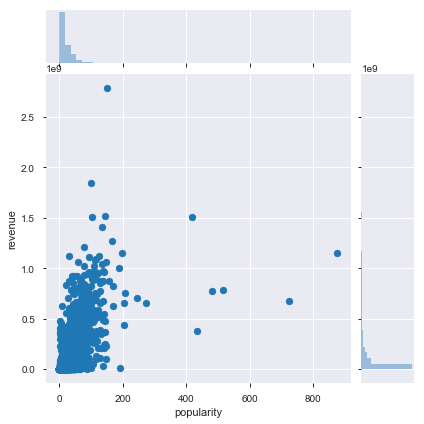

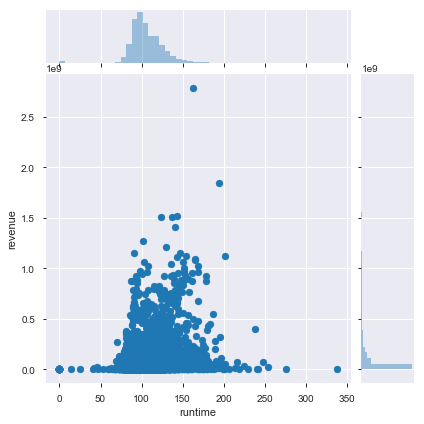

In [9]:
sns.jointplot(train.budget, train.revenue);
sns.jointplot(train.popularity, train.revenue);
sns.jointplot(train.runtime, train.revenue);
plt.show()

In [10]:
train.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [11]:
# taking care of missing values
train['runtime'] = train['runtime'].fillna(method='ffill')

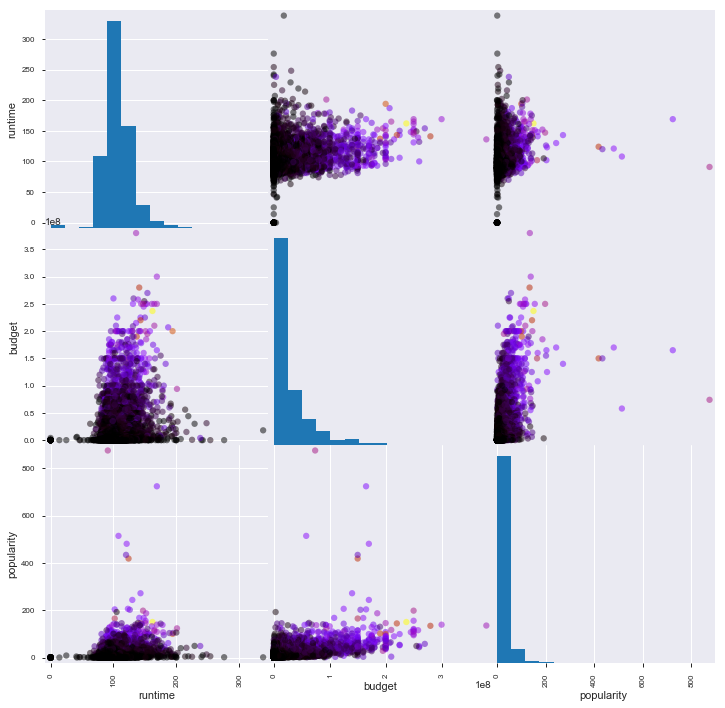

In [12]:
# Pairplot
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(train[['runtime', 'budget', 'popularity']], c=train.revenue, cmap=cmap, figsize=(12,12), marker='o', s=40,
                           hist_kwds = {'bins' : 15})

In [16]:
train.status = pd.get_dummies(train.status)
train.status.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: uint8

In [65]:
X = train[['runtime', 'budget','popularity','vote_average','status','vote_count']]
y = train.revenue

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

## Using Linear Regression

In [66]:
#Linear Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
def rmsle(y,y0): return np.sqrt(np.mean(np.square(np.log1p(y)-np.log1p(y0)))) 
reg = LinearRegression()
lin_model = reg.fit(X_train, y_train)
lin_pred = reg.predict(X_val)

rmse_lm=rmsle(y_val, lin_pred)
rmse_lm=rmse_lm.round(2)
print('RMSLE score for linear model is {}'.format(rmsle(y_val, lin_pred)))
print(rmse_lm)

RMSLE score for linear model is 5.439399744127972
5.44


## Using Decision Tree

In [67]:
# fitting decision tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier

Dt=DecisionTreeClassifier(max_depth=9)
Dt.fit(X_train, y_train)

dt_pred=Dt.predict(X_val)

rmse_dt=rmsle(y_val, dt_pred)

rmse_dt=rmse_dt.round(2)
print(rmse_dt)
print('RMSLE score for Decision Tree model is {}'.format(rmsle(y_val, dt_pred)))

11.91
RMSLE score for Decision Tree model is 11.91388392865502


## Using Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_model = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)

rmse_rf=rmsle(y_val, rf_pred)

rmse_rf=rmse_rf.round(2)
print(rmse_rf)

7.11


## Using KNN algorithm

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5)
knn_model = knn.fit(X_train, y_train)
knn_pred = knn.predict(X_val)

rmse_knn=rmsle(y_val, knn_pred)

rmse_knn=rmse_knn.round(2)
print('RMSLE score for k-NN model is {}'.format(rmsle(y_val, knn_pred)))
print(rmse_knn)

RMSLE score for k-NN model is 6.840805450912972
6.84


## Using Support Vector Machines

In [70]:
# fitting Support vector Machines

from sklearn.svm import SVC

svm=SVC()
svm.fit(X_train, y_train)
svm_pred=svm.predict(X_val)

rmse_svm=rmsle(y_val, svm_pred)

rmse_svm=rmse_svm.round(2)
print(rmse_svm)

14.74


In [ ]:
# fitting Xg boost classifier
#!pip install xgboost
from xgboost.sklearn import XGBClassifier

Xg = XGBClassifier()
Xg.fit(X_train, y_train)

xg_pred=Xg.predict(X_val)

rmse_xg=rmsle(y_val, xg_pred)

rmse_xg=rmse_xg.round(2)
print(rmse_xg)

  Using cached https://files.pythonhosted.org/packages/51/c1/198915b13e98b62a98f48309c41012638464651da755d941f4abe384c012/xgboost-0.82-py2.py3-none-win_amd64.whl


In [71]:
## Fitting Naive Baye's Classifier for Multinomial Model
from sklearn.naive_bayes import MultinomialNB
l_clf = MultinomialNB()

l_clf.fit(X_train, y_train)

nb_pred = l_clf.predict(X_val)

rmse_nb=rmsle(y_val, nb_pred)

rmse_nb=rmse_nb.round(2)
print(rmse_nb)


8.65


In [73]:
## Fitting Passive Aggresive Model
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter=50)

linear_clf.fit(X_train, y_train)
pg_pred = linear_clf.predict(X_val)
rmse_pg=rmsle(y_val, pg_pred)

rmse_pg=rmse_pg.round(2)

print(rmse_pg)


C:\Users\Hitman\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Hitman\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


5.91


## Using Neural Network

In [74]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(hidden_layer_sizes=(1))

mlp.fit(X_train, y_train)

NN_pred=mlp.predict(X_val)

In [75]:
rmse_NN=rmsle(y_val, NN_pred)
rmse_NN=rmse_NN.round(2)
print(rmse_NN)

14.74


In [58]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(hidden_layer_sizes=(30))
mlp.fit(X_train, y_train)
NN1_pred=mlp.predict(X_val)

In [61]:
rmse_NN1=rmsle(y_val, NN1_pred)
rmse_NN1=rmse_NN1.round(2)
print(rmse_NN1)


14.74


In [76]:
table={"RMSE":pd.Series([rmse_lm,rmse_knn,rmse_rf,rmse_dt,rmse_nb,rmse_svm,rmse_pg,rmse_NN])}
table1=pd.DataFrame(table)
table1.index=['Linear Regression','KNN','random_forest','Decision Tree','Nave bayes','SVM','Passive Agressive','Neural Network']
table1

,RMSE
Linear Regression,5.44
KNN,6.84
random_forest,7.11
Decision Tree,11.91
Nave bayes,8.65
SVM,14.74
Passive Agressive,5.91
Neural Network,14.74


In [77]:
table1.to_excel("D:/Placements assignments/Dhira activity/visual.xlsx", encoding='utf-8')